# Practice for Module 2

We are familiar with univariate, bivariate and multivariate analysis of data from the lab notebooks of week 1 and 2. We have seen how visualizations help us in analyzing the data and their limitations in analyzing multi dimensional data. 

Lets continue our discussion on bivariate and multi variate data analysis by working through this practice notebook. You will be provided with code snippets to complete/modify the code for generating desired output. We will look into the bikeshare dataset on which we worked in week1.

__Remember__ to look for the `<what goes in here>` and similar prompts to complete the code. 

### Loading data

Load the data `\datasets\bikeshare\hour.csv` into R and name the datframe as `bikeshare_data`

In [3]:
bikeshare_data <- read.csv("../../../datasets/bikeshare/hour.csv", header = T, sep=",")
head(bikeshare_data)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


First few rows suggests most of the data is either numeric or discrete in nature except for date column. Again we are interetsed in identifying the independent variables which are related to variable `cnt`. 

Lets run summary() on dataset. 

In [4]:
summary(bikeshare_data)

    instant             dteday          season            yr        
 Min.   :    1   2011-01-01:   24   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   2011-01-08:   24   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   2011-01-09:   24   Median :3.000   Median :1.0000  
 Mean   : 8690   2011-01-10:   24   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   2011-01-13:   24   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   2011-01-15:   24   Max.   :4.000   Max.   :1.0000  
                 (Other)   :17235                                   
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.  

** Activity 1: ** What is the structure of the dataset.

In [5]:
str(bikeshare_data)


'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


We know the dimension of the dataset and datatypes of all features. Lets plot some scatter plots for cnt variable against rest of the independent variables.

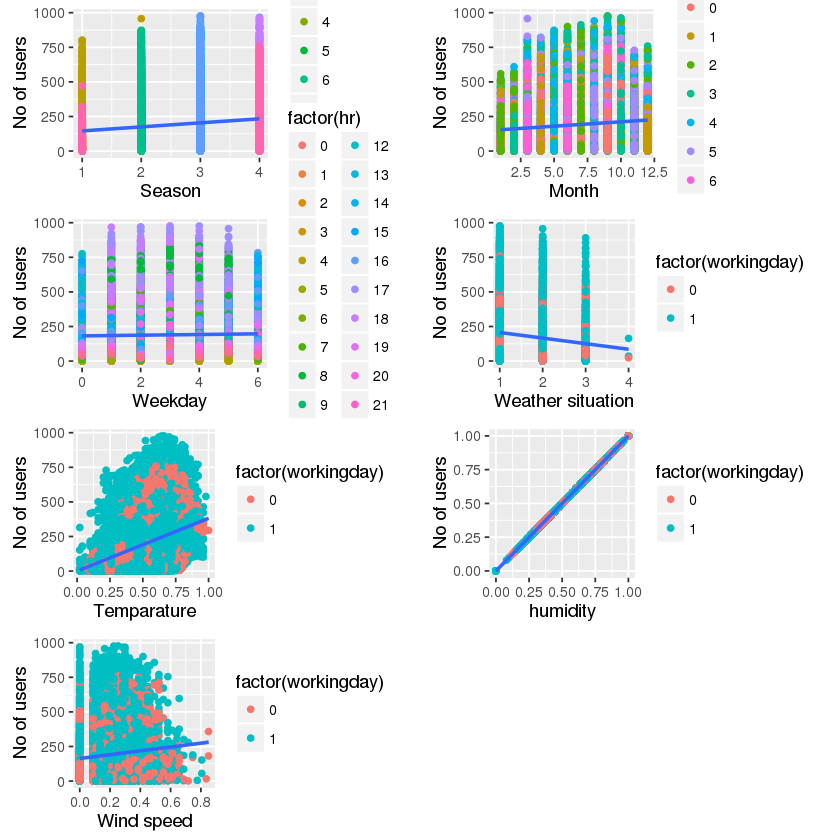

In [6]:
#package for plotting graphs
library(ggplot2)

#package for arranging multiple graphs in a grid layout
library(gridExtra)

grid.arrange(
    ggplot(bikeshare_data, aes(x=season,y=cnt)) + xlab("Season")+ ylab("No of users") + 
    geom_point(aes(colour = factor(mnth))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=mnth,y=cnt)) + xlab("Month")+ ylab("No of users") + 
    geom_point(aes(colour = factor(weekday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=weekday,y=cnt)) + xlab("Weekday")+ ylab("No of users") + 
    geom_point(aes(colour = factor(hr))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=weathersit,y=cnt)) + xlab("Weather situation")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=temp,y=cnt)) + xlab("Temparature")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=hum,y=hum)) + xlab("humidity")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ggplot(bikeshare_data, aes(x=windspeed,y=cnt)) + xlab("Wind speed")+ ylab("No of users") + 
    geom_point(aes(colour = factor(workingday))) + geom_smooth(method=lm),
    
    ncol=2)    

There are some positive linear relationships between cnt and season, month, weather situation, temparature, humidity, windspeed. 

**Activity 2: ** Plot individual scatter plots between variables 

    2.a cnt and month
    2.b cnt and temp
    2.c cnt and hum
    2.d cnt and windspeed
    2.e cnt and hr
    2.f cnt and weathersit

Use weekday for plotting points with different colors. Add a regression line. Calculate pearson correlation coefficients for all  pairs of variables.

In [7]:
# Your code for activity 2.a goes here
ggplot(<what goes in here>, aes(x=<what goes in here>,y=<what goes in here>)) + xlab("Month")+ ylab("No of users") + 
    geom_point(aes(colour = <<what goes in here>>)) + geom_smooth(<what goes in here>)

cor.test(<what goes in here>,<what goes in here>)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:8: unexpected '<'
1: # Your code for activity 2.a goes here
2: ggplot(<
          ^


In [ ]:
# Your code for activity 2.b goes here
ggplot(<what goes in here>, aes(x=<what goes in here>,y=<what goes in here>)) + xlab("Temparature")+ ylab("No of users") + 
    geom_point(<what goes in here>) + geom_smooth(method=lm)

cor.test(bikeshare_data$temp,bikeshare_data$cnt)

In [ ]:
# Your code for activity 2.c goes here
ggplot(<what goes in here>, aes(<what goes in here>) + xlab("Humidity")+ ylab("No of users") + 
    geom_point(<what goes in here>) + <what goes in here>

cor.test(bikeshare_data$hum,bikeshare_data$cnt)

In [ ]:
# Your code for activity 2.d goes here
ggplot(bikeshare_data, <what goes in here>) + xlab("Wind speed")+ ylab("No of users") + 
    <what goes in here> + <what goes in here>

cor.test(bikeshare_data$windspeed,bikeshare_data$cnt)

In [ ]:
# Your code for activity 2.e goes here
ggplot(bikeshare_data, aes(x=hr,y=cnt)) + xlab("Hour")+ ylab("No of users") + 
    + geom_point(aes(colour = factor(weekday))) + geom_smooth()

cor.test(bikeshare_data$hr,bikeshare_data$cnt)

In [ ]:
# Your code for activity 2.f goes here
ggplot(bikeshare_data, aes(x=weathersit,y=cnt)) + xlab("Weather Situation")+ ylab("No of users") + 
     + geom_smooth(method=lm)

cor.test(bikeshare_data$weathersit,bikeshare_data$cnt)

** Activity 3: ** Plot a 3 dimensional plot using scatterplot3d package. plot temp on x-axis, hum on y-axis and cnt on z-axis. use season as the 4 th dimension in the form of color.  

  temp  hum cnt
1 0.24 0.81  16
2 0.22 0.80  40
3 0.22 0.80  32
4 0.24 0.75  13
5 0.24 0.75   1
6 0.24 0.75   1


ERROR: Error in legend(plot$xyz.convert(0.9, 0.9, 800), legend = levels((bikeshare_data$season)), : 'legend' is of length 0


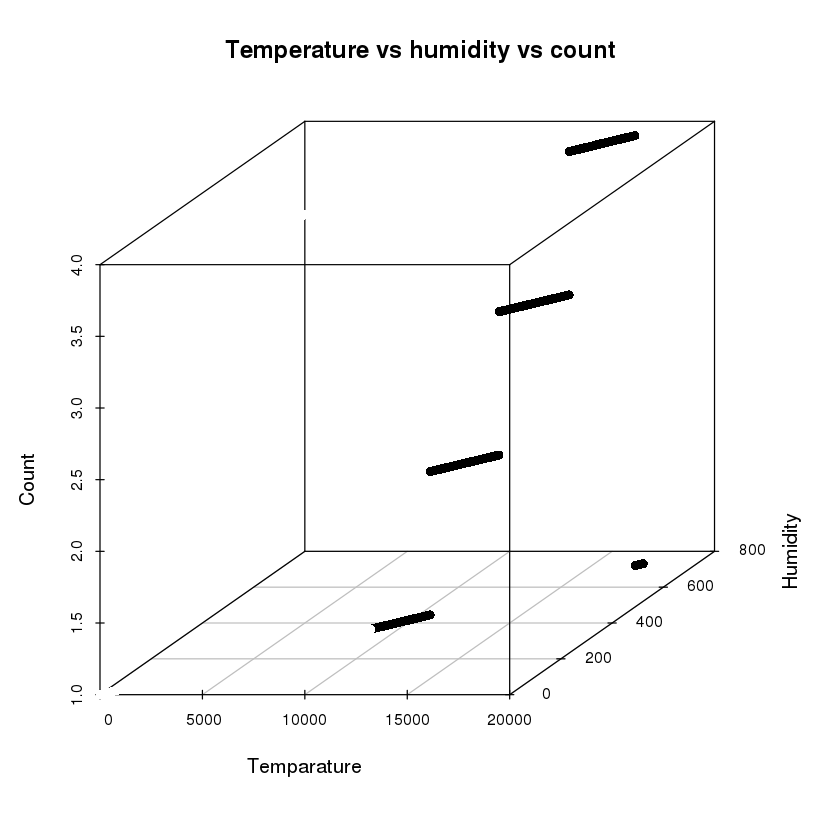

In [11]:
# Your code for activity 3 goes here
library(scatterplot3d)

#Assigning each unique value in season variable a different color
colors <- c("orange", "green", "magenta","blue")
colors <- colors[bikeshare_data$season]

#Use dplyr to select columns temp, hum, cnt from bikeshare_data and supply as data below
data = bikeshare_data[c("temp","hum","cnt")]
print(head(data))
scatterplot3d(bikeshare_data,angle = 45,color=colors,pch = 16,
              main="Temperature vs humidity vs count",
              xlab = "Temparature",
              ylab = "Humidity",
              zlab = "Count")

              legend(plot$xyz.convert(0.9,0.9,800), legend = levels((bikeshare_data$season)),
                     col =  c("orange", "green", "magenta","blue"), pch = 16)

** Activity 4: ** Plot a graph in ggplot for cnt vs temp using hr for color parameter as third dimension. Use dplyr to supply the input data to ggplot() command.

In [ ]:
# Your code for activity 4 goes here
# install.packages('dplyr',repos='http://cran.us.r-project.org')

library(dplyr)
library(ggplot2)

#Select temp, cnt and hr variables from bikeshare_data using select function in dplyr 
<what goes in here> %>%
    <what goes in here>(temp, cnt,hr) %>%
#filter hour to be greater than 11
    filter(<what goes in here>) %>% ggplot(aes(x=temp, y=<what goes in here>, color=<what goes in here>)) + 
    xlab("temparature") + ylab("count") +  geom_point()

** Activity 5: ** Use dplyr to group the data by weekday and summerise casual, registered and cnt variables using mean function.

In [ ]:
bikeshare_data %>%
    <what goes in here>(weekday) %>%
    summarise_each(<what goes in here>, casual,<what goes in here>,<what goes in here>)

** Activity 6: ** Use dplyr to group the data by weekday and hr and summarize the data in descending order.

In [ ]:
bikeshare_data %>%
    group_by(weekday, <what goes in here>) %>%
    summarise(bikeshare_count = n()) %>%
    arrange(<what goes in here>(bikeshare_count))